# Visualizing model outcomes

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

# CNN training outcomes
#### Path to the saved training history 

In [8]:
CNN_HIST_PATHS = {}

# Set the file paths
DirPath = '/Users/anthony/Documents/Comp551_Projects/CapNET/CNN_training_outcomes/'

CNN_HIST_PATHS['cleanMnist'] = DirPath + 'clean_mnist/clean-mnist_CNN_25Epochs_history.pickle'
CNN_HIST_PATHS['noisyMnist'] = DirPath + 'noisy_mnist/noisy-mnist_CNN_25Epochs_history.pickle'
CNN_HIST_PATHS['fashionMnist'] = DirPath + 'fashion_mnist/fashion-mnist_CNN_25Epochs_history.pickle'

del DirPath

#### Unpickle and load training history

In [11]:
HistDicts = {}

for key in CNN_HIST_PATHS:
    print(key)
    HistDicts[key] = pickle.load( open( CNN_HIST_PATHS[key], "rb" ) )

cleanMnist
noisyMnist
fashionMnist


### Visualize each of the training outcomes

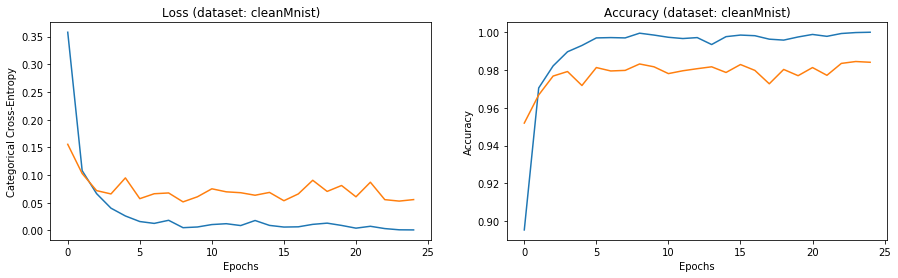

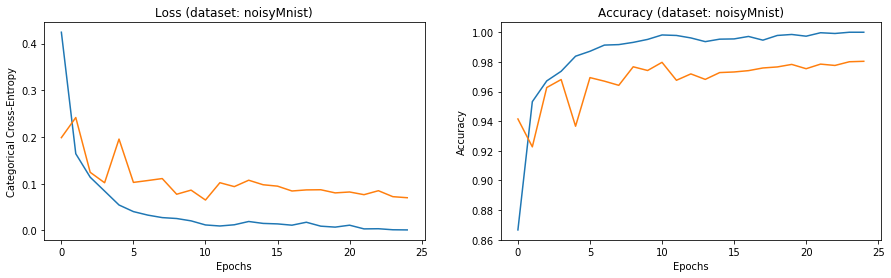

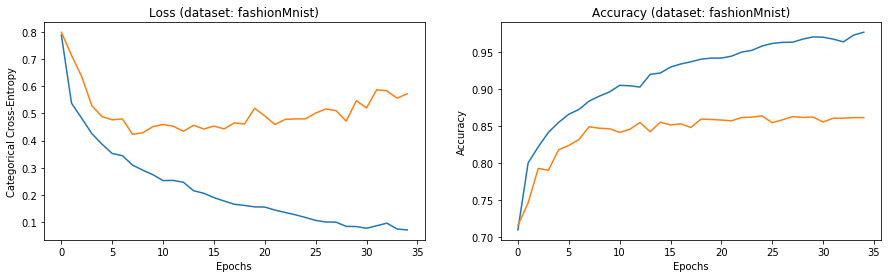

In [39]:
for key in HistDicts:
    # Unpack current history dictionary
    curHist = HistDicts[key]
    
    plt.figure(figsize=(15,4))
    
    # Visualize loss
    plt.subplot(1,2,1)
    plt.plot(curHist['loss'])
    plt.plot(curHist['val_loss'])
    plt.title('Loss (dataset: %s)' % key)
    plt.ylabel('Categorical Cross-Entropy')
    plt.xlabel('Epochs')
    
    # Visualize accuracy
    plt.subplot(1,2,2)
    plt.plot(curHist['acc'])
    plt.plot(curHist['val_acc'])
    plt.title('Accuracy (dataset: %s)' % key)
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    
    plt.show()
    del curHist
    

# CapNET Training Outcomes
#### Path to the saved training history 

In [28]:
CAP_HIST_PATHS = {}

# Set the file paths
DirPath = '/Users/anthony/Documents/Comp551_Projects/CapNET/CapNET_training_outcomes/'

CAP_HIST_PATHS['cleanMnist'] = DirPath + 'mnist_log.csv'
CAP_HIST_PATHS['noisyMnist'] = DirPath + 'noisy_mnist_log.csv'
CAP_HIST_PATHS['fashionMnist'] = DirPath + 'fashion_log.csv'

del DirPath

In [31]:
CapDfsDict = {}

for key in CAP_HIST_PATHS:
    print(key)
    CapDfsDict[key] = pd.read_csv(CAP_HIST_PATHS[key])
    
# Get a preview
CapDfsDict['cleanMnist'][0:3]

cleanMnist
noisyMnist
fashionMnist


,epoch,capsnet_acc,capsnet_loss,decoder_loss,loss,val_capsnet_acc,val_capsnet_loss,val_decoder_loss,val_loss
0,0,0.336333,0.520346,0.122281,0.568280,0.8343,0.206439,0.068468,0.233279
1,1,0.838500,0.180568,0.060410,0.204248,0.9487,0.083175,0.061062,0.107112
2,2,0.927167,0.099694,0.056826,0.121970,0.9636,0.062078,0.057721,0.084704


### Visualize training outcomes

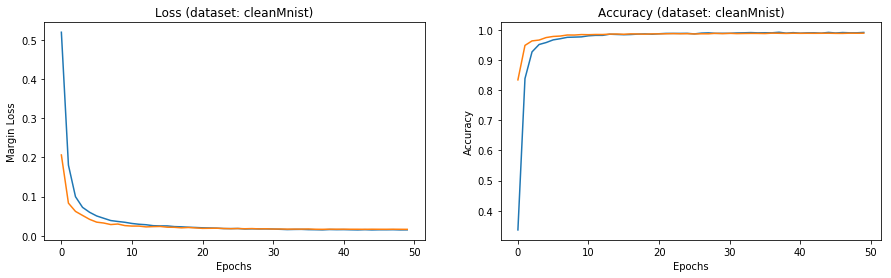

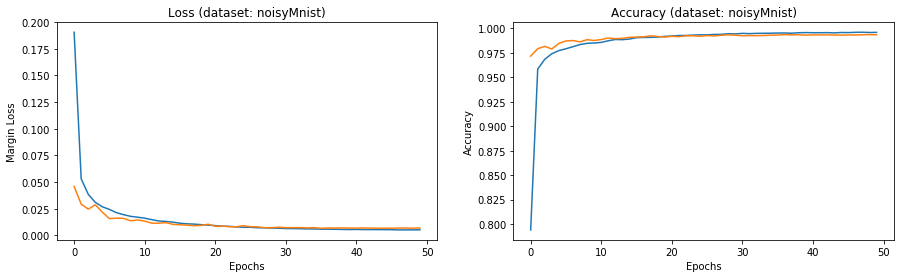

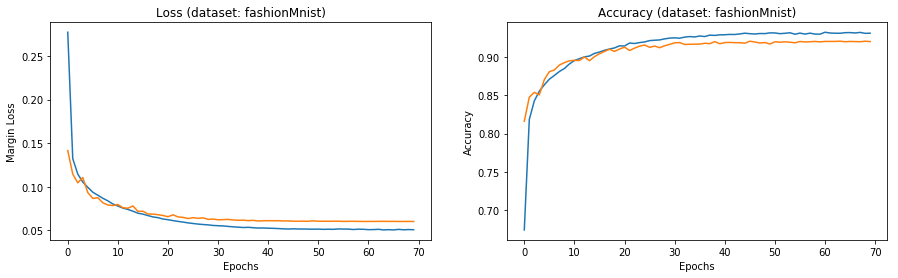

In [40]:
for key in CapDfsDict:
    # Unpack current history dictionary
    curDf = CapDfsDict[key]
    
    plt.figure(figsize=(15,4))
    
    # Visualize loss
    plt.subplot(1,2,1)
    plt.plot(curDf['capsnet_loss'].values)
    plt.plot(curDf['val_capsnet_loss'].values)
    plt.title('Loss (dataset: %s)' % key)
    plt.ylabel('Margin Loss')
    plt.xlabel('Epochs')
    
    # Visualize accuracy
    plt.subplot(1,2,2)
    plt.plot(curDf['capsnet_acc'].values)
    plt.plot(curDf['val_capsnet_acc'].values)
    plt.title('Accuracy (dataset: %s)' % key)
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    
    plt.show()
    del curDf

# Compare models
### Compare divergence of accuracy

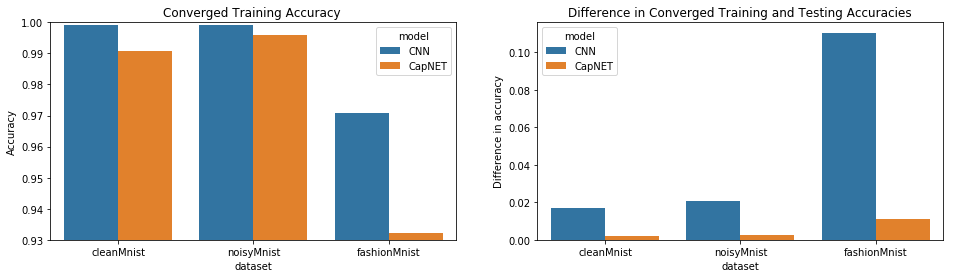

In [67]:
N_LAST_EPCH = 5

visDfDict = {}
visDfDict['dataset'] = []
visDfDict['difference'] = []
visDfDict['model'] = []
visDfDict['accuracy'] = []


for key in HistDicts:
    # Get history dictionary for CNN
    curHist = HistDicts[key]
    # Get history dataframe for CapNET
    curDf = CapDfsDict[key]
    
    # Get the accuracies
    cnn_train_acc = curHist['acc']
    cnn_test_acc = curHist['val_acc']
    cap_train_acc = curDf['capsnet_acc'].values
    cap_test_acc = curDf['val_capsnet_acc'].values
    
    # Get the averaged absolute training accuracy
    cnn_avgAcc = np.average(cnn_train_acc[-N_LAST_EPCH:])
    cap_avgAcc = np.average(cap_train_acc[-N_LAST_EPCH:])
    
    # Compute the ean difference between the last N timpepoints
    cnn_avgDiff = np.average(cnn_train_acc[-N_LAST_EPCH:]) - np.average(cnn_test_acc[-N_LAST_EPCH:])
    cap_avgDiff = np.average(cap_train_acc[-N_LAST_EPCH:]) - np.average(cap_test_acc[-N_LAST_EPCH:])
    
    # Set up the columns of the dataframe
    visDfDict['dataset'].append(key)
    visDfDict['accuracy'].append(cnn_avgAcc)
    visDfDict['difference'].append(cnn_avgDiff)
    visDfDict['model'].append('CNN')
    
    visDfDict['dataset'].append(key)
    visDfDict['accuracy'].append(cap_avgAcc)
    visDfDict['difference'].append(cap_avgDiff)
    visDfDict['model'].append('CapNET')
    
    del curHist, curDf, cnn_avgAcc, cap_avgAcc, cnn_train_acc, cnn_test_acc, cap_train_acc, cap_test_acc
    
# Initialize dataframe for training accuracy
visTrAccDf = pd.DataFrame()
for key in visDfDict:
    if key == 'difference':
        continue
    visTrAccDf[key] = visDfDict[key]

# Initialize dataframe for difference in accuracy
visDiffDf = pd.DataFrame()
for key in visDfDict:
    if key == 'accuracy':
        continue
    visDiffDf[key] = visDfDict[key]
    
# Visualize
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x='dataset', y="accuracy", hue="model", data=visTrAccDf)
plt.title("Converged Training Accuracy ")
plt.ylabel('Accuracy')
plt.gca().set_ylim([0.93,1.0])

plt.subplot(1,2,2)
sns.barplot(x='dataset', y="difference", hue="model", data=visDiffDf)
plt.title('Difference in Converged Training and Testing Accuracies')
plt.ylabel('Difference in accuracy')
plt.show()
    
del N_LAST_EPCH, visTrAccDf, visDiffDf

# Different levels of noise

In [70]:
# Manually set the accuracies
diffNoiseDict = {}
diffNoiseDict['sigma'] = [0.0, 0.14, 0.22, 0.30, 0.38]
diffNoiseDict['CapNET'] = [0.9892, 0.8313, 0.4721, 0.2323, 0.154]
diffNoiseDict['CNN'] = [0.9841, 0.9245, 0.5963, 0.3657, 0.275]

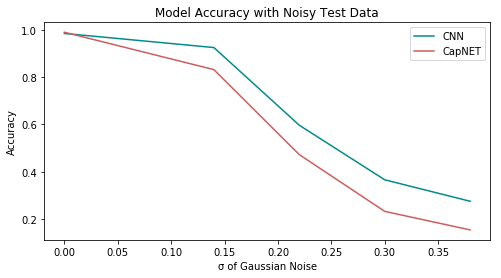

In [80]:
# Visualize
plt.figure(figsize=(8,4))
plt.plot(diffNoiseDict['sigma'], diffNoiseDict['CNN'], c='darkcyan')
plt.plot(diffNoiseDict['sigma'], diffNoiseDict['CapNET'], c='indianred')
plt.title('Model Accuracy with Noisy Test Data')
plt.ylabel('Accuracy')
plt.xlabel('σ of Gaussian Noise')
plt.legend(['CNN','CapNET'])
plt.show()